In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import deepdish as dd

In [2]:
def load(args):
    cache_path = f"{args['save-dir']}/{args['experiment']}/{args['expid']}/cache"
    cache_file = f"{cache_path}/{args['visualization']}.h5"
    if os.path.isfile(cache_file):
        steps, empirical, theoretical = dd.io.load(cache_file)
        return (steps, empirical, theoretical)
    else:
        return (None, None, None)

In [3]:
def plot(steps, empirical, theoretical, axes, layer_list=None, layer_wise=False, subset=0, normalize=False, legend=False):
    
    if empirical is not None:
        # get layer list
        if layer_list == None:
            layers = list(empirical.keys())
        else:
            layers = [list(empirical.keys())[i] for i in layer_list]
    
    # plot empirical
    if empirical is not None:
        for layer in layers:
            norm = list(empirical[layer].values())
            if layer_wise:
                norm = [np.sum(i) for i in norm]
            if subset > 0:
                norm = [i[0:subset] for i in norm]
            if normalize:
                norm = norm / norm[0]
            color = plt.cm.tab10(0)
            if "conv" in layer:
                color = plt.cm.tab20(int(layer.split("conv")[1]) - 1)
            axes.plot(
                steps,
                norm,
                color=color,
                lw=5,
                label=layer
            )
    if legend:
        plt.legend()
            
    # plot theoretical
    if theoretical is not None:
        for layer in layers:
            norm = list(theoretical[layer].values())
            if layer_wise:
                norm = [np.sum(i) for i in norm]
            if subset > 0:
                norm = [i[0:subset] for i in norm]
            if normalize:
                norm = norm[0]
            axes.plot(
                steps,
                norm,
                color='w',
                ls='--',
                lw=2,
                alpha=1
            )

# Motivational Figure

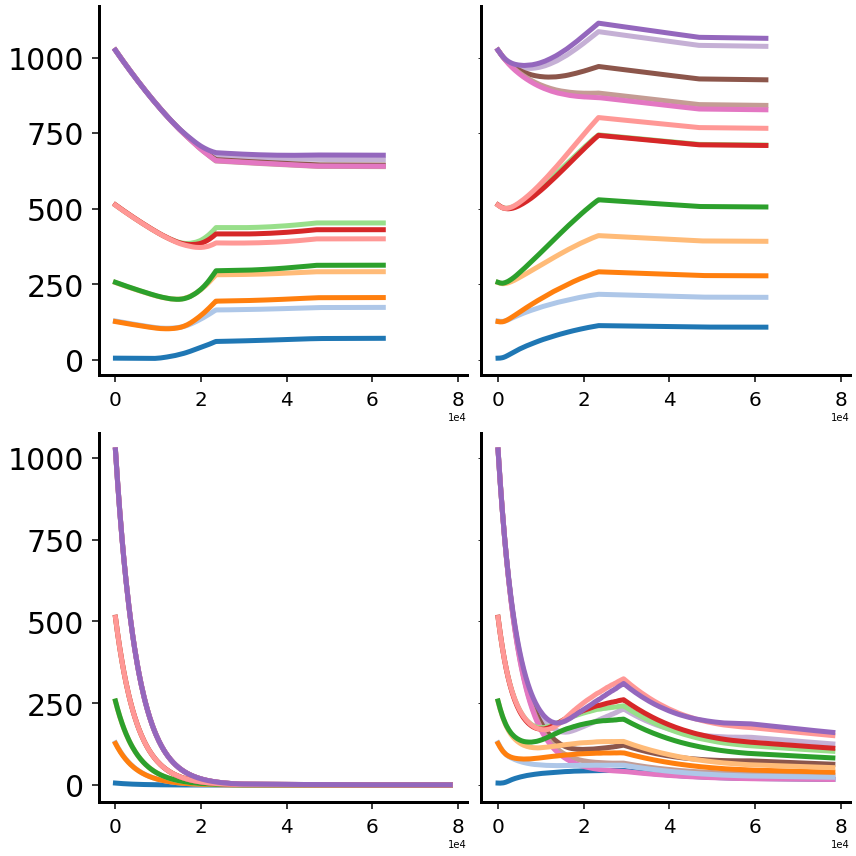

In [5]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "lr_drops",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex='col', sharey='row')
lr, wd = 0.01, 0.0
for i, expid in enumerate(["vgg16", "vgg16_bn", "vgg16_e200_lr1_wd3", "vgg16_bn_e200_lr1_wd3"]):

        # plot data
        ax = axs[i//2, i%2]
        args['expid'] = f"{expid}"
        steps, empirical, theoretical = load(args)
        plot(steps, empirical, None, ax, layer_wise=True)

        # tick params and axis labels
        if i%2 == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.tick_params(axis="x", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,
                       labelsize=20)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

## Tiny-ImageNet

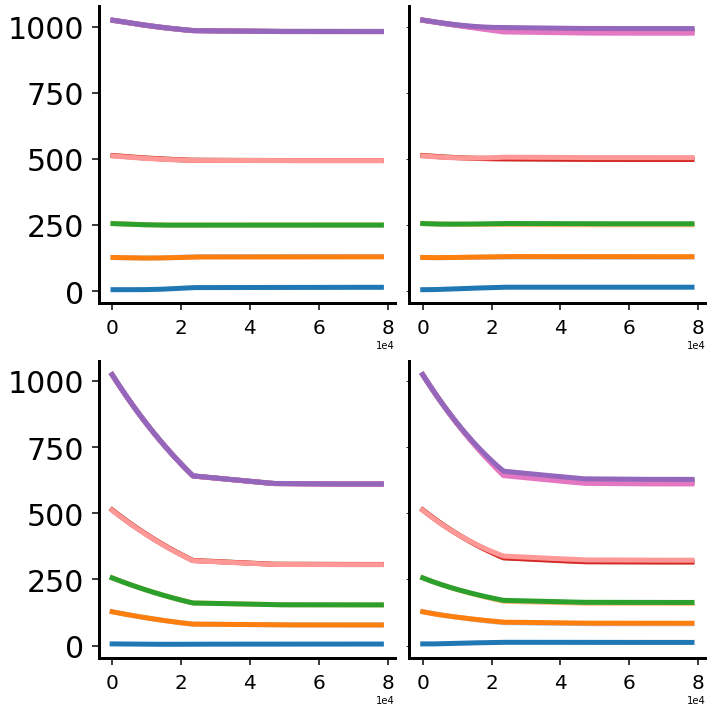

In [8]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "tiny",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex='col', sharey='row')
for i, expid in enumerate(["vgg16_lr2_wd4", "vgg16bn_lr2_wd4", "vgg16_lr2_wd3", "vgg16bn_lr2_wd3"]):

        # plot data
        ax = axs[i//2, i%2]
        args['expid'] = f"{expid}"
        steps, empirical, theoretical = load(args)
        plot(steps, empirical, None, ax, layer_wise=True)

        # tick params and axis labels
        if i%2 == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.tick_params(axis="x", which="both", bottom=True, top=False,
                       labelbottom=True, left=True, right=False,
                       labelleft=True,direction='out',length=7,width=1.5,pad=8,
                       labelsize=20)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# Translation Symmetry

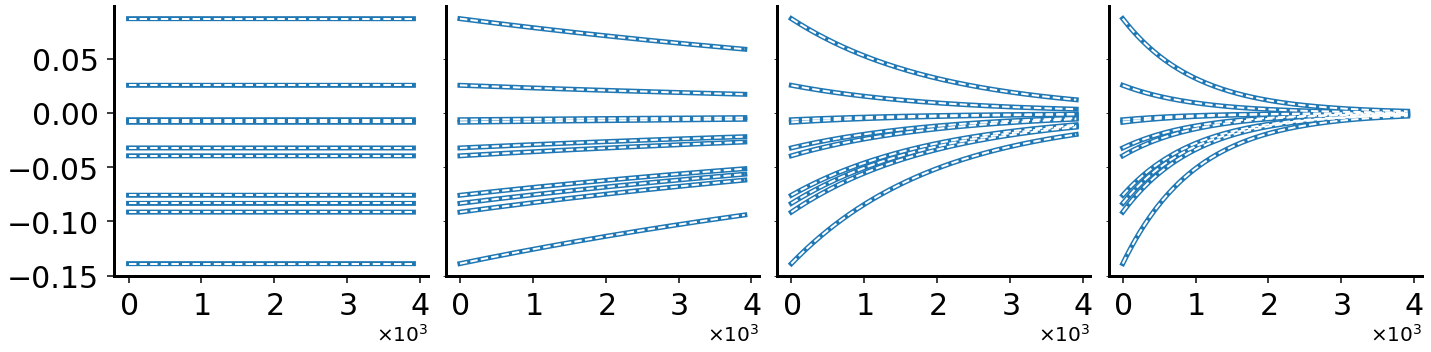

In [4]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "visualization": "translation"
}
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex='col', sharey=True)
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[j]
        if lr == 0.01:
            args['experiment'] = f"vgg16_long"
        else:
            args['experiment'] = f"vgg16"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, subset=10) # layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 0:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("translation.pdf")

# Scale Symmetry

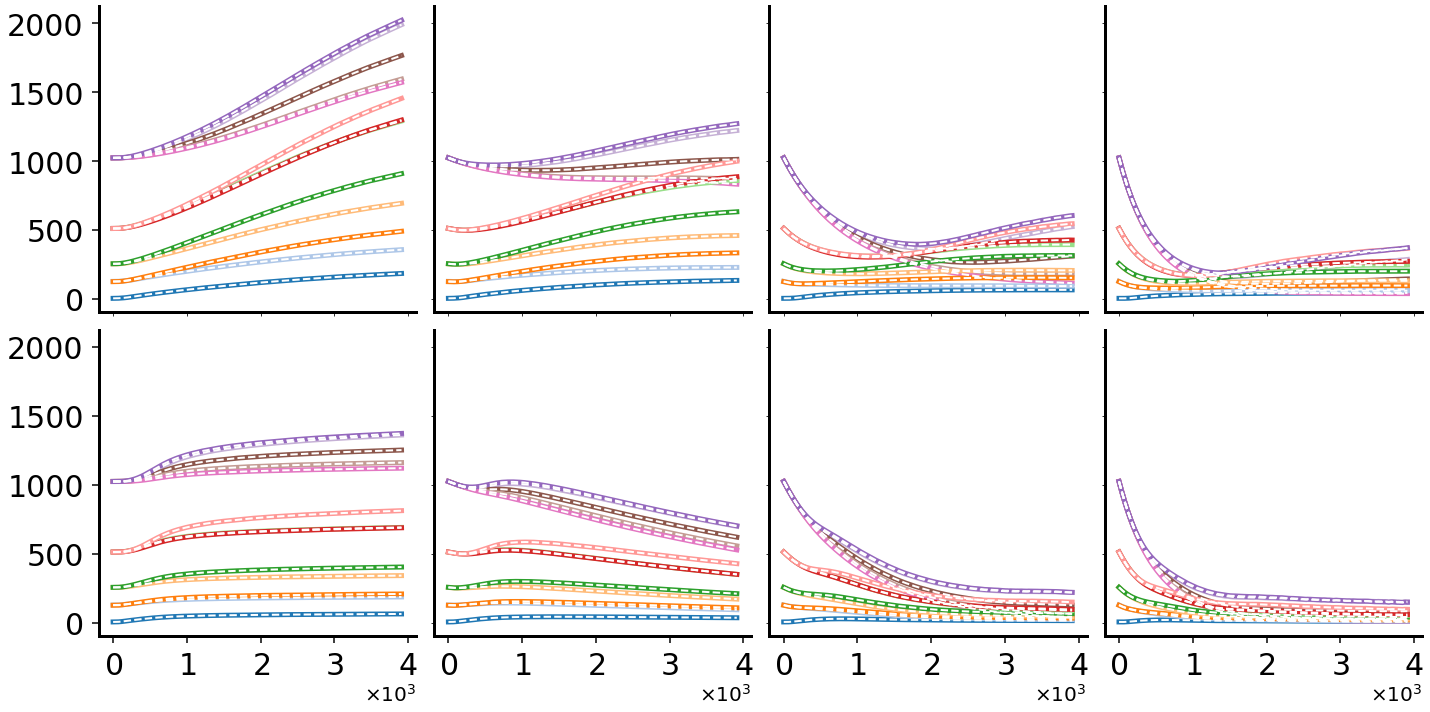

In [4]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16_bn",
    "visualization": "scale"
}
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex='col', sharey=True)
for i, lr in enumerate([0.1, 0.01]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[i,j]
        if lr == 0.01 and wd != 0.0005:
            args['experiment'] = f"vgg16bn_long"
        else:
            args['experiment'] = f"vgg16_bn"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)  

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("scale.pdf")

# Inversion Symmetry

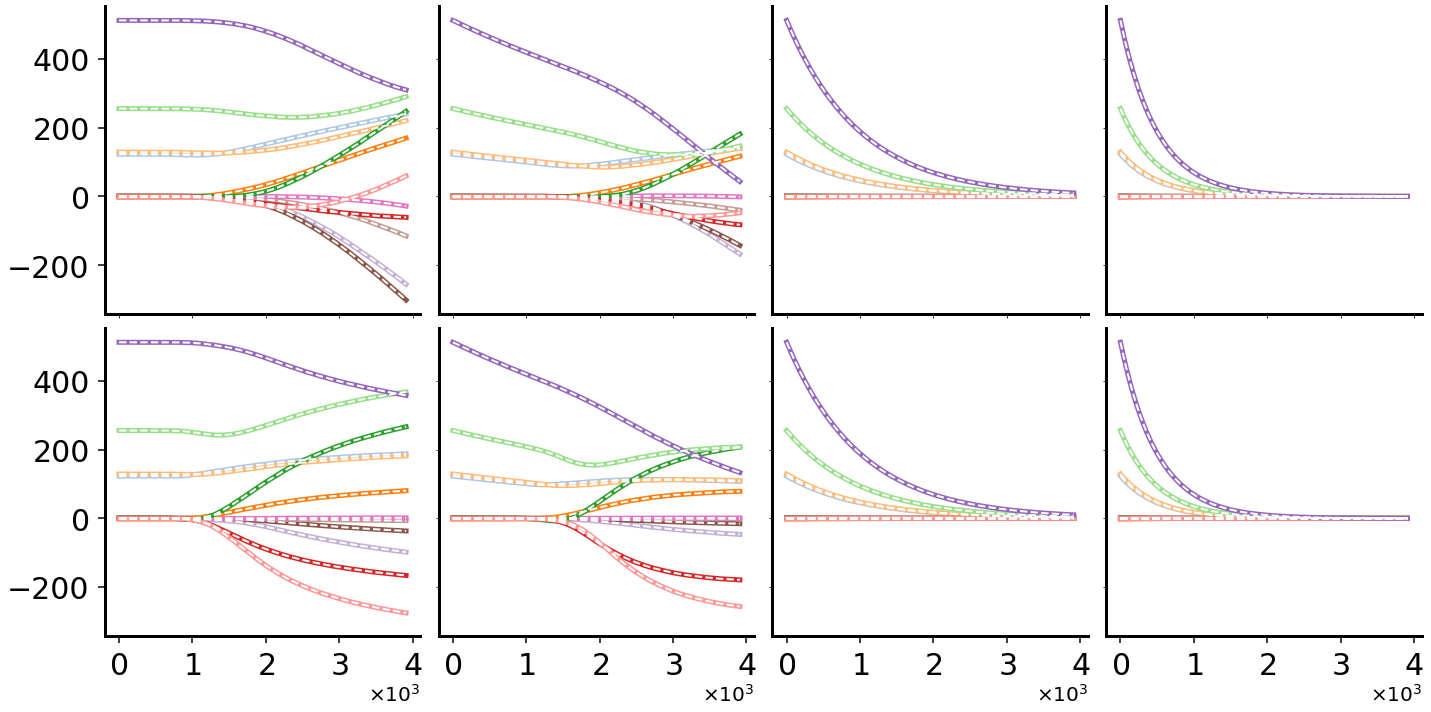

In [11]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharex='col', sharey=True)
for i, lr in enumerate([0.1, 0.01]):
    for j, wd in enumerate([0.0, 0.0001, 0.0005, 0.001]):
        
        # plot data
        ax = axs[i,j]
        if lr == 0.01 and wd != 0.0005:
            args['experiment'] = f"vgg16_long"
        else:
            args['experiment'] = f"vgg16"
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=30)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
            ax.xaxis.offsetText.set_fontsize(20)
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()
plt.savefig("inversion.pdf")

# Extra Long Training

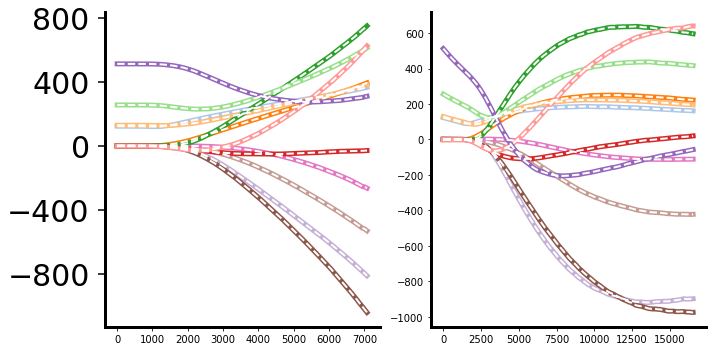

In [12]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}_e1000"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

# Large Batch Size

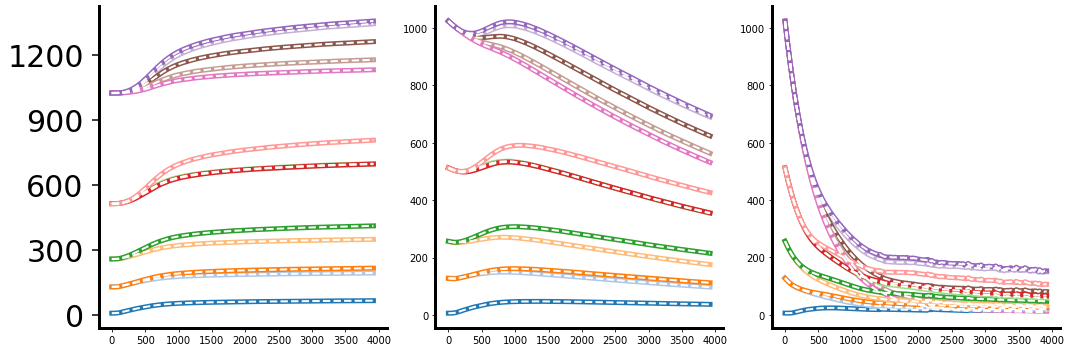

In [14]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16bn_large_batch",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "scale"
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()

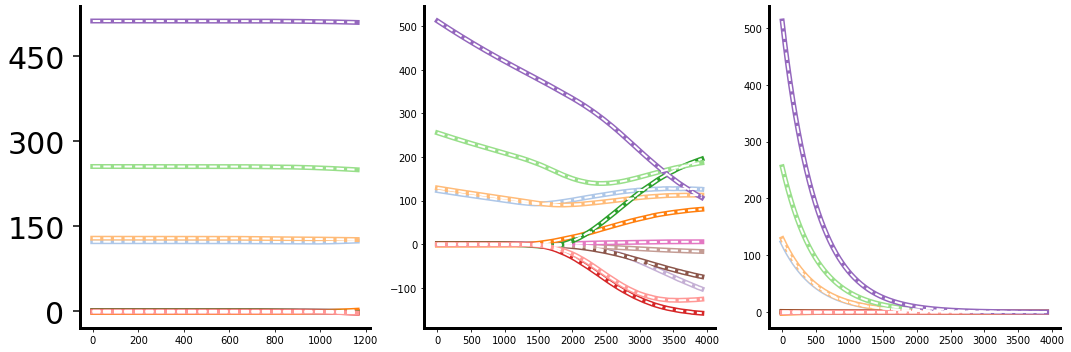

In [15]:
args = {
    "save-dir": "/mnt/fs4/kunin/neural-mechanics/results",
    "experiment": "vgg16_large_batch",
    "expid": "lr_0.1_wd_0.0",
    "visualization": "inversion"
}
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex='col')#, sharey=True) #sharex='col'
for i, lr in enumerate([0.1]):
    for j, wd in enumerate([0.0, 0.0001, 0.001]):
        
        # plot data
        ax = axs[j]
        args['expid'] = f"lr_{lr}_wd_{wd}"
        steps, empirical, theoretical = load(args)
        if steps is not None:
            steps = [lr * float(step) for step in steps]
        plot(steps, empirical, theoretical, ax, layer_wise=True)

        # tick params and axis labels
        if j == 0:
            ax.tick_params(axis="y", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=30)
            ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        if i == 1:
            ax.tick_params(axis="x", which="both", bottom=True, top=False,
                           labelbottom=True, left=True, right=False,
                           labelleft=True,direction='out',length=7,width=1.5,pad=8,
                           labelsize=20)
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))
            ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
            
        # boundary
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False) 
        for dir in ["top", "bottom", "right", "left"]:
            ax.spines[dir].set_linewidth(3)
            
plt.tight_layout()